***Умова:***

Використовуючи дані із файлу student_scores.csv побудуйте модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів. Оцініть якість отриманої регресії.


**1. Отримаємо дані залежностей балу від протяжності навчання у вигляді pandas датафруйму.**

In [18]:
import pandas as pd

df = pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**2. Знайдемо коефіцієнт точки перетуну $\alpha$ та коефіцієнт регресії  $\beta$ (коефіцієнт очікування зміни).**

In [56]:
import numpy as np
from sklearn import linear_model

predictors, outcome = pd.DataFrame(df['Hours']), pd.DataFrame(df['Scores'])


model = linear_model.LinearRegression()
model.fit(predictors, outcome)

print(f"Intercept: {model.intercept_[0]:.2f}")              #alpha
print(f"Regression coefficient: {model.coef_[0][0]:.2f}")   #beta

Intercept: 2.48
Regression coefficient: 9.78


**3. Побудуємо графічне відображення моделі лінійної регресії.**

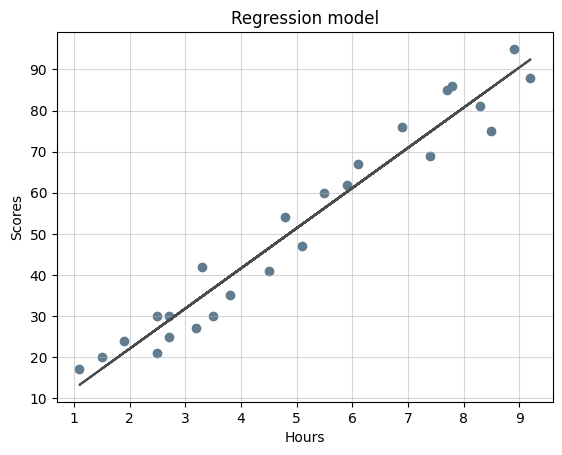

In [63]:
import matplotlib.pyplot as plt

fitted = model.predict(predictors)

plt.scatter(predictors, outcome, color = '#607c8e' )
plt.plot(predictors, fitted, color = "#494d4e" )
plt.title("Regression model")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(axis='x', alpha=0.5)
plt.grid(axis='y', alpha=0.5)

plt.show()

**4. Оцінмио якість регресії за допомогою показників RMSE та $R^2$.**

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(outcome, fitted))    # корінь середньквадратичної похибки, для порівняння з іншими моделями
r2 = r2_score(outcome, fitted)                         # коефіцієнт детермінації

print(f'RMSE: {RMSE:.2f}')
print(f'r2: {r2:.4f}')

RMSE: 5.37
r2: 0.9529


**Оскільки коефіцієнт детермінації наближається до 1, то можна сказати, що модель має досить високу точність**